<a href="https://colab.research.google.com/github/deepuvkrish/brain_tumor_detection/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing required modules

In [1]:
pip install -q tensorflow

In [2]:
!pip install -q kaggle

### Importing required libraries

In [42]:
import keras, os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

### DATASET loading

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deepakkv38","key":"108c6cad6346ab3739f7531c490ef2bc"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 13.3MB/s]
100% 15.1M/15.1M [00:00<00:00, 19.3MB/s]


In [9]:
from zipfile import ZipFile
file_name="brain-mri-images-for-brain-tumor-detection.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print(" Extraction completed")

 Extraction completed


### DATASET Split

In [11]:
trdata = ImageDataGenerator
traindata = trdata().flow_from_directory(directory="/content/brain_tumor_dataset", target_size=(224,224))

tsdata = ImageDataGenerator
testdata = tsdata().flow_from_directory(directory="/content/brain_test", target_size=(224,224))

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


### VGG16 Architecture implementation

In [14]:
VGG = keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

VGG.trainable = False

In [28]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
hist = model.fit_generator(steps_per_epoch=len(traindata),
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=len(testdata),
                           epochs=5
                           )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
8/8 [==============================] - 4s 534ms/step - loss: 0.0788 - accuracy: 0.9881 - val_loss: 1.8960e-04 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 4s 536ms/step - loss: 0.0290 - accuracy: 0.9921 - val_loss: 1.4159e-06 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 4s 526ms/step - loss: 0.0113 - accuracy: 0.9921 - val_loss: 1.0530e-05 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 4s 535ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 0.9960
Epoch 5/5
8/8 [==============================] - 4s 559ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 9.4844e-07 - val_accuracy: 1.0000


In [39]:
model.save('vggclg.h5')

#### Plotting data

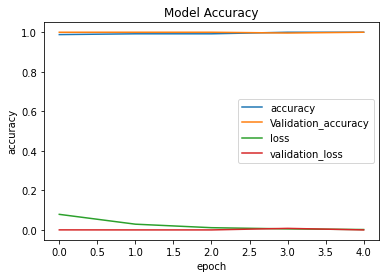

In [40]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["accuracy","Validation_accuracy","loss","validation_loss"])
plt.show()

Cancerous tumor detected..!!


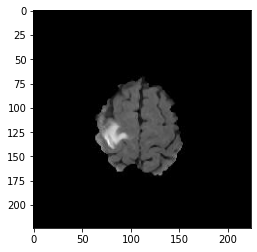

In [87]:
from keras.preprocessing import image
img = image.load_img("/content/Image363.jpg", target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("/content/vggclg.h5")
output = saved_model.predict(img)

if output[0][0]>output[0][1]:
  print("Cancerous tumor not detected..!!")
else:
  print("Cancerous tumor detected..!!")

Cancerous tumor detected..!!


### VGG Classical method

In [67]:
pip install -q pyyaml h5py

In [71]:

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(224, 224, 3), padding="same", activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 56, 56, 256)     

In [74]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5",
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)
early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')
hist = model.fit_generator(steps_per_epoch=len(traindata),
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=len(testdata),
                           epochs=10,
                           callbacks=[checkpoint,early])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


8/8 [==============================] - 8s 1s/step - loss: 0.6705 - accuracy: 0.5810 - val_loss: 0.6844 - val_accuracy: 0.5455

Epoch 00001: val_accuracy improved from -inf to 0.54545, saving model to vgg16_1.h5
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 0.6632 - accuracy: 0.6561 - val_loss: 1.4993 - val_accuracy: 0.6126

Epoch 00002: val_accuracy improved from 0.54545 to 0.61265, saving model to vgg16_1.h5
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.7452 - accuracy: 0.6403 - val_loss: 0.6708 - val_accuracy: 0.6522

Epoch 00003: val_accuracy improved from 0.61265 to 0.65217, saving model to vgg16_1.h5
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.6635 - accuracy: 0.6482 - val_loss: 0.6195 - val_accuracy: 0.7312

Epoch 00004: val_accuracy improved from 0.65217 to 0.73123, saving model to vgg16_1.h5
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.5738 - accuracy: 0.7233 - val_loss: 0.5778 

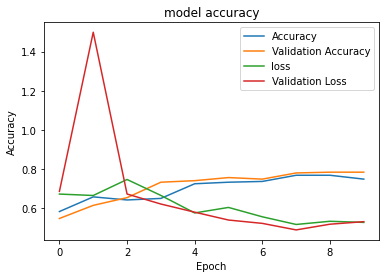

In [75]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


 CANCEROUS TUMOR NOT DETECTED..!!



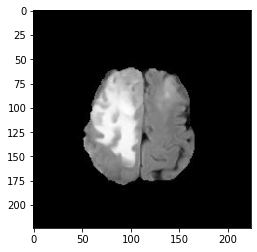

In [86]:
from keras.preprocessing import image
img = image.load_img("/content/Image401.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("\n CANCEROUS TUMOR NOT DETECTED..!!\n")
else:
  print("\n CANCEROUS TUMOR DETECTED..!!\n")